# Link Prediction
This notebook uses a synthetic graph to demo two link prediction algorithms: CCPA and the Soundarajan-Hopcroft algorithm. For the second algorithm, we have also added community labels to the graph. 

### Import

In [7]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import networkx as nx
from sknetwork.data import karate_club
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import louvain_communities

### Fonts

In [8]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Load the Karate Club data through sknetwork

In [63]:
data = karate_club(metadata=True)
A = data['adjacency'].toarray()*1.0
labels = data['labels']
X = data['position']

### Create NetworkX Graph from adjacency matrix

In [64]:
G = nx.from_numpy_matrix(A)
edges = np.array(list(G.edges))

### Community Detection for the Soundarajan Hopcroft Algorithm

In [65]:
louvain = louvain_communities(G)
community_attributes = {}
for c,community in enumerate(louvain):
    community = list(community)
    for item in community:
        community_attributes[item] = c
nx.set_node_attributes(G, community_attributes, "louvain")

### Link Prediction Algorithms

In [74]:
sh_preds = []
ccpa_preds = []
soundarajan_hopcroft = nx.cn_soundarajan_hopcroft(G,community='louvain')
ccpa = nx.common_neighbor_centrality(G)
for u, v, p in soundarajan_hopcroft:
    sh_preds.append((u,v,p))
for u, v, p in ccpa:
    ccpa_preds.append((u,v,p))

### Community Plot Colors

In [85]:
community_colors = np.zeros((4,3))
community_colors[0,0] = 1.0
community_colors[1,2] = 1.0
community_colors[2,1] = 0.5
community_colors[3,0] = 1.0
community_colors[3,1] = 1.0
community_colors[3,2] = 0.5

### Plot the results of both methods

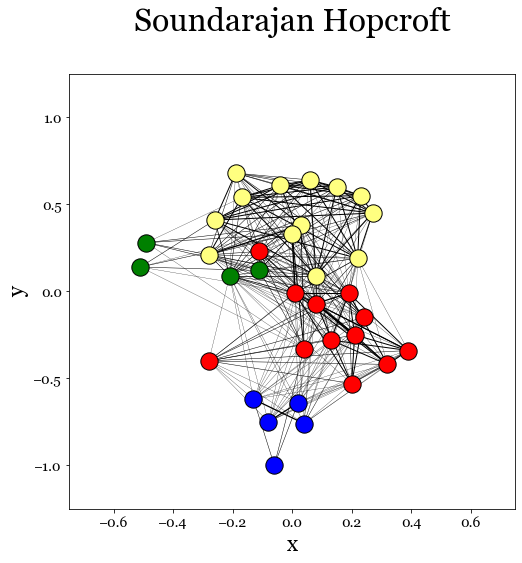

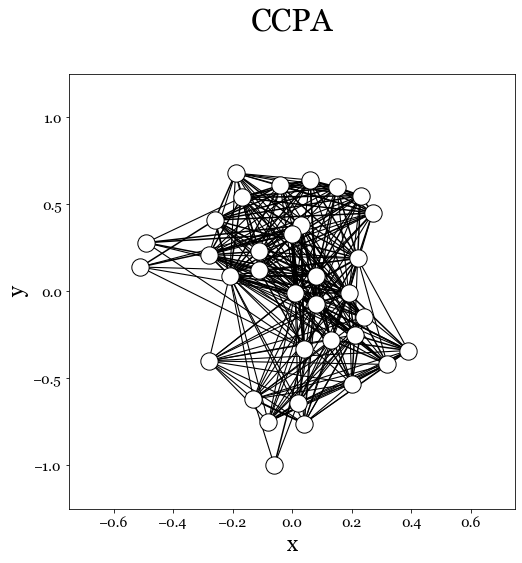

In [101]:
plt.figure(figsize=(8,8))
for c,community in enumerate(louvain):
    community = list(community)
    plt.scatter(X[community,0],X[community,1],color=community_colors[c,:],edgecolor='k',s=300,zorder=1000);
for item in sh_preds:
    u,v,strength = item
    node1 = X[u,:]
    node2 = X[v,:]
    strength = strength / 4
    if (strength > 0):
        plt.plot([node1[0],node2[0]],[node1[1],node2[1]],linewidth=strength,c='k')
    plt.axis((-0.75,0.75,-1.25,1.25))
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.title('Soundarajan Hopcroft\n',fontsize=32,**csfont)
plt.savefig('../../assets/figures/020/link_prediction_1.png',dpi=300,bbox_inches="tight")


plt.figure(figsize=(8,8));
plt.scatter(X[:,0],X[:,1],color='w',edgecolor='k',s=300,zorder=1000);
for item in ccpa_preds:
    u,v,strength = item
    node1 = X[u,:]
    node2 = X[v,:]
    strength = (strength - 2) / 2
    if (strength > 1.0):
        plt.plot([node1[0],node2[0]],[node1[1],node2[1]],linewidth=strength,c='k')
plt.axis((-0.75,0.75,-1.25,1.25))
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.title('CCPA\n',fontsize=32,**csfont);
plt.savefig('../../assets/figures/020/link_prediction_2.png',dpi=300,bbox_inches="tight")